In [54]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
#import KMeans
df=pd.read_csv("data_14.csv")
df
#import altair as alt 


,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change
0,468.0,0.0,24.9,31.0,100.0,4.0,0.0,993.8,4.0,-3.0,-0.3,-0.4
1,140.0,0.0,27.9,22.0,20.0,1.0,0.0,1004.1,4.0,-2.0,0.6,-1.0
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3
3,467.0,0.0,26.7,26.0,100.0,3.0,0.0,992.3,4.0,-1.0,1.2,-1.3
4,138.0,0.0,29.1,22.0,20.0,1.0,0.0,1001.3,4.0,-2.0,2.5,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,474.0,0.1,6.4,95.0,4.0,1.0,3.0,999.9,4.0,-1.0,5.9,1.5
1435,65.0,0.0,6.4,93.0,10.0,4.0,3.0,983.9,4.0,-1.0,5.2,3.1
1436,159.0,0.1,8.5,83.0,10.0,2.0,1.0,969.7,4.0,1.0,1.4,1.9
1437,99.0,0.1,7.5,91.0,10.0,3.0,3.0,995.4,4.0,-4.0,2.7,1.7


A fentebb található blokkban meghívásra kerülnek a legfontosabb előre definiált függvények, illetve beolvasásra kerül a forrásállomány, aminek néhány sorát megjelenítem.

In [5]:
pd.set_option('display.max_columns',None)
pd.options.display.max_rows

60

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   water_level      1439 non-null   float64
 1   precipitation    1439 non-null   float64
 2   temperature      1439 non-null   float64
 3   humidity         1439 non-null   float64
 4   visibility       1439 non-null   float64
 5   wind             1439 non-null   float64
 6   weather          1439 non-null   float64
 7   pressure         1439 non-null   float64
 8   fire             1439 non-null   float64
 9   wl_change        1439 non-null   float64
 10  temp_change      1439 non-null   float64
 11  pressure_change  1439 non-null   float64
dtypes: float64(12)
memory usage: 135.0 KB


### Adattábla oszlopainak bemutatása


Fentebb látható, hogyan néznek ki az adattábla oszlopai értékeinek típusai. Az adattáblában 12 oszlop található. (0-11)


0: a vízszintet(mélység) megjelenítő oszlop cm-ben kifejezve


1: csapadék miliméterben kifejezve


2: hőmérséklet celsiusfokban kifejezve


3 :pártartalom %-os értékben kifejezve


4: láthatóság km-ben kifejezve


5: szél(erőssége) méter per szekundumban kifejezve


6: időjárás "minősége" 1-9 közötti skálán elhelyezve


7: a víznyomás erőssége GPA-ban kifejezve


8: tűzveszélyesség szintje


9: vízszint változás mértéke 


10: hőmérséklet változás mértéke


11: a víznyomás változásának mértéke



# Előfeldolgozás

In [7]:
print('\nAz előfeldolgozás előtti sor és oszlopszámok')
df.shape 


Az előfeldolgozás előtti sor és oszlopszámok


(1439, 12)

In [8]:
#df['humidity'] = df['humidity'].astype(float) így tudom visszalakítani a float típusra ha az integer nem megfelelő
df = df.astype({"weather":'int', "fire":'int', "water_level":'int'}) 
df.info()
#szűrőfeltételek
filter=df.water_level>=0 #változó neve=adathalmaz neve.oszlop operátor operandus
#df[filter]
filter2=df.temperature>-4
#df[filter2]
filt= filter & filter2
#df[filt]
df=df[filt]
print('\n\nAz előfeldolgozás utáni sor és oszlopszámok')
df.shape #az adathalmaz sor és oszlopszáma az előfeldolgozás végeztével


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   water_level      1439 non-null   int64  
 1   precipitation    1439 non-null   float64
 2   temperature      1439 non-null   float64
 3   humidity         1439 non-null   float64
 4   visibility       1439 non-null   float64
 5   wind             1439 non-null   float64
 6   weather          1439 non-null   int64  
 7   pressure         1439 non-null   float64
 8   fire             1439 non-null   int64  
 9   wl_change        1439 non-null   float64
 10  temp_change      1439 non-null   float64
 11  pressure_change  1439 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 135.0 KB


Az előfeldolgozás utáni sor és oszlopszámok


(1408, 12)

Az előfeldolgozás során, úgy ítéltem meg hogy 2 oszlop vonatkozásában mindenképpen szükséges volt bizonyos sorok törlése.
A vízmélység esetén 0-nál alacsonyabb érték nem értelmezhető, ezen felül a víz hőmérséklete -4 celsius foknál nem lehet alacsonyabb, mert abban az esetben már jégről beszélünk.

Az értékekre vonatkozó megszorításokon felül, néhány oszlopnak a típusát átalakítottam float típusúról integer típusúra, mert nem tartalmaztak törtrészeket.

# Vizualizáció (A3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba15db9950>,
      dtype=object)

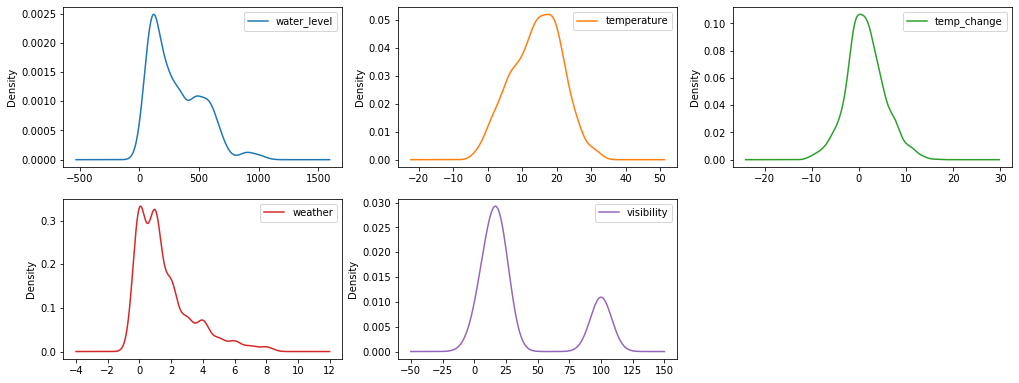

In [9]:
kivonat = ['water_level', 'temperature', 'temp_change', 'weather', 'visibility']
df[kivonat].plot.density(subplots=True, sharex=False, layout=(3,3),figsize=(17,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba15686590>,
      dtype=object)

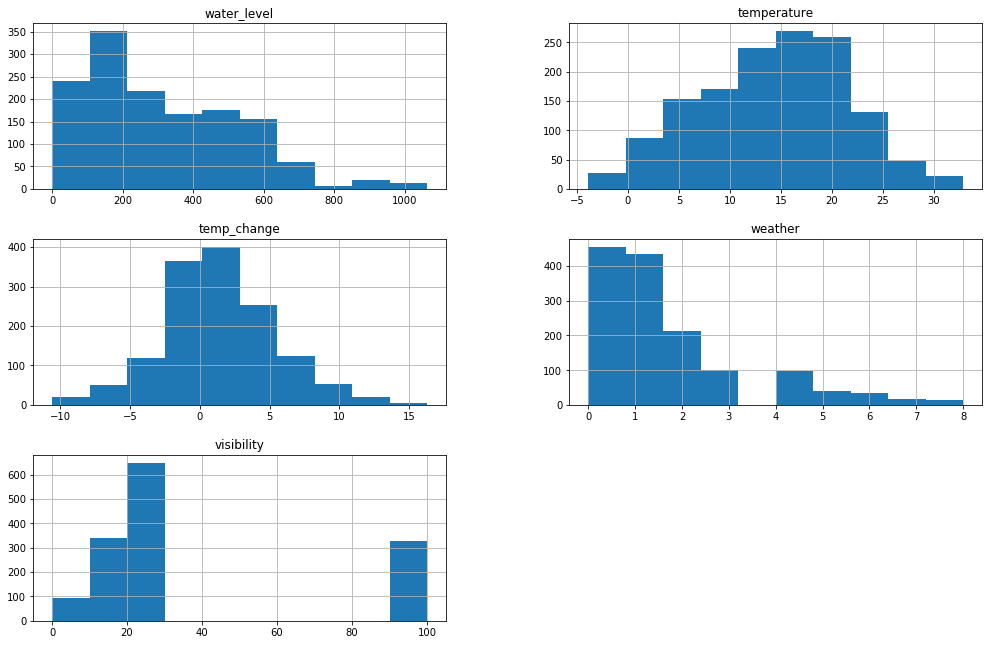

In [10]:
df[kivonat].hist(figsize=(17,11))

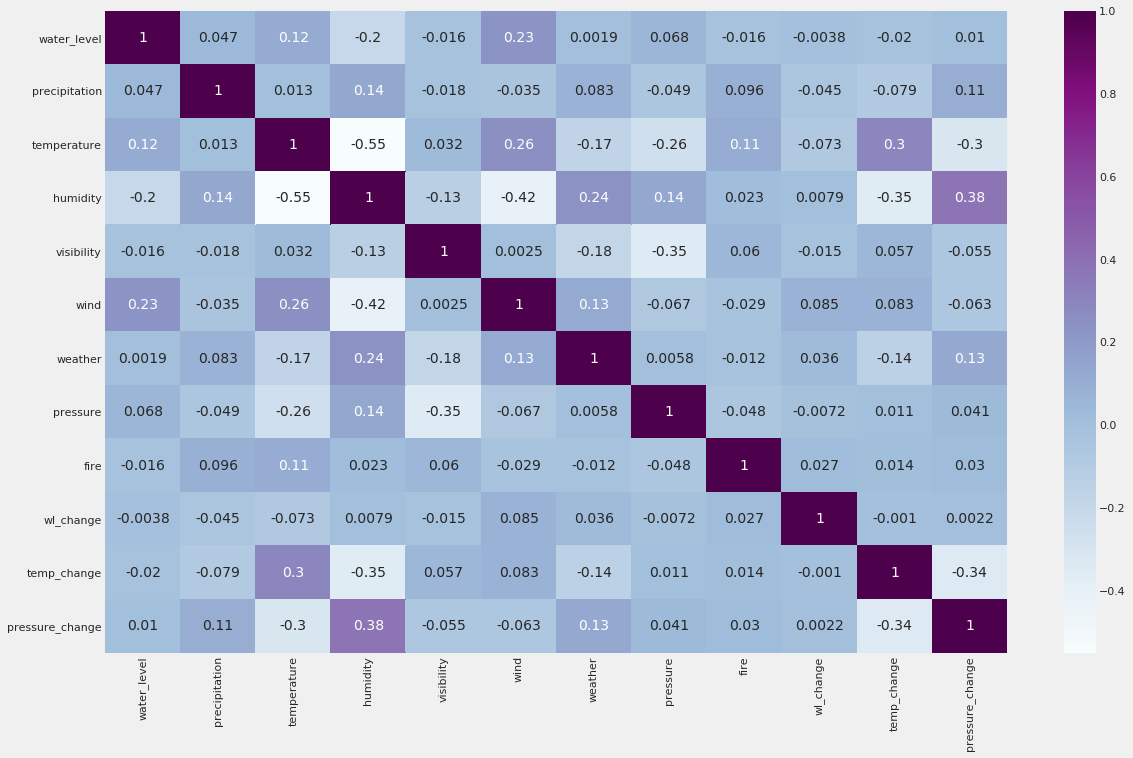

In [58]:
plt.figure(figsize=(18,11))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")

water_level       AxesSubplot(0.125,0.657941;0.227941x0.222059)
temperature    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
temp_change    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
weather           AxesSubplot(0.125,0.391471;0.227941x0.222059)
visibility     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

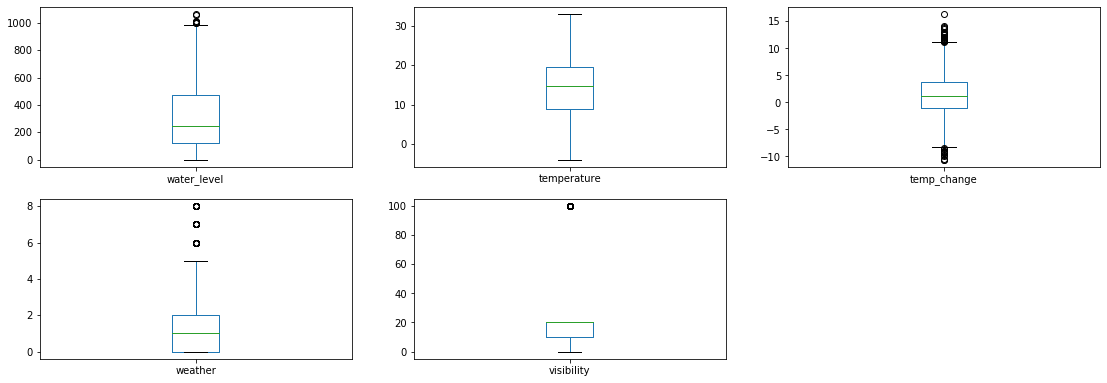

In [11]:
df[kivonat].plot.box(subplots=True, sharex=False, layout=(3,3),figsize=(19,10))

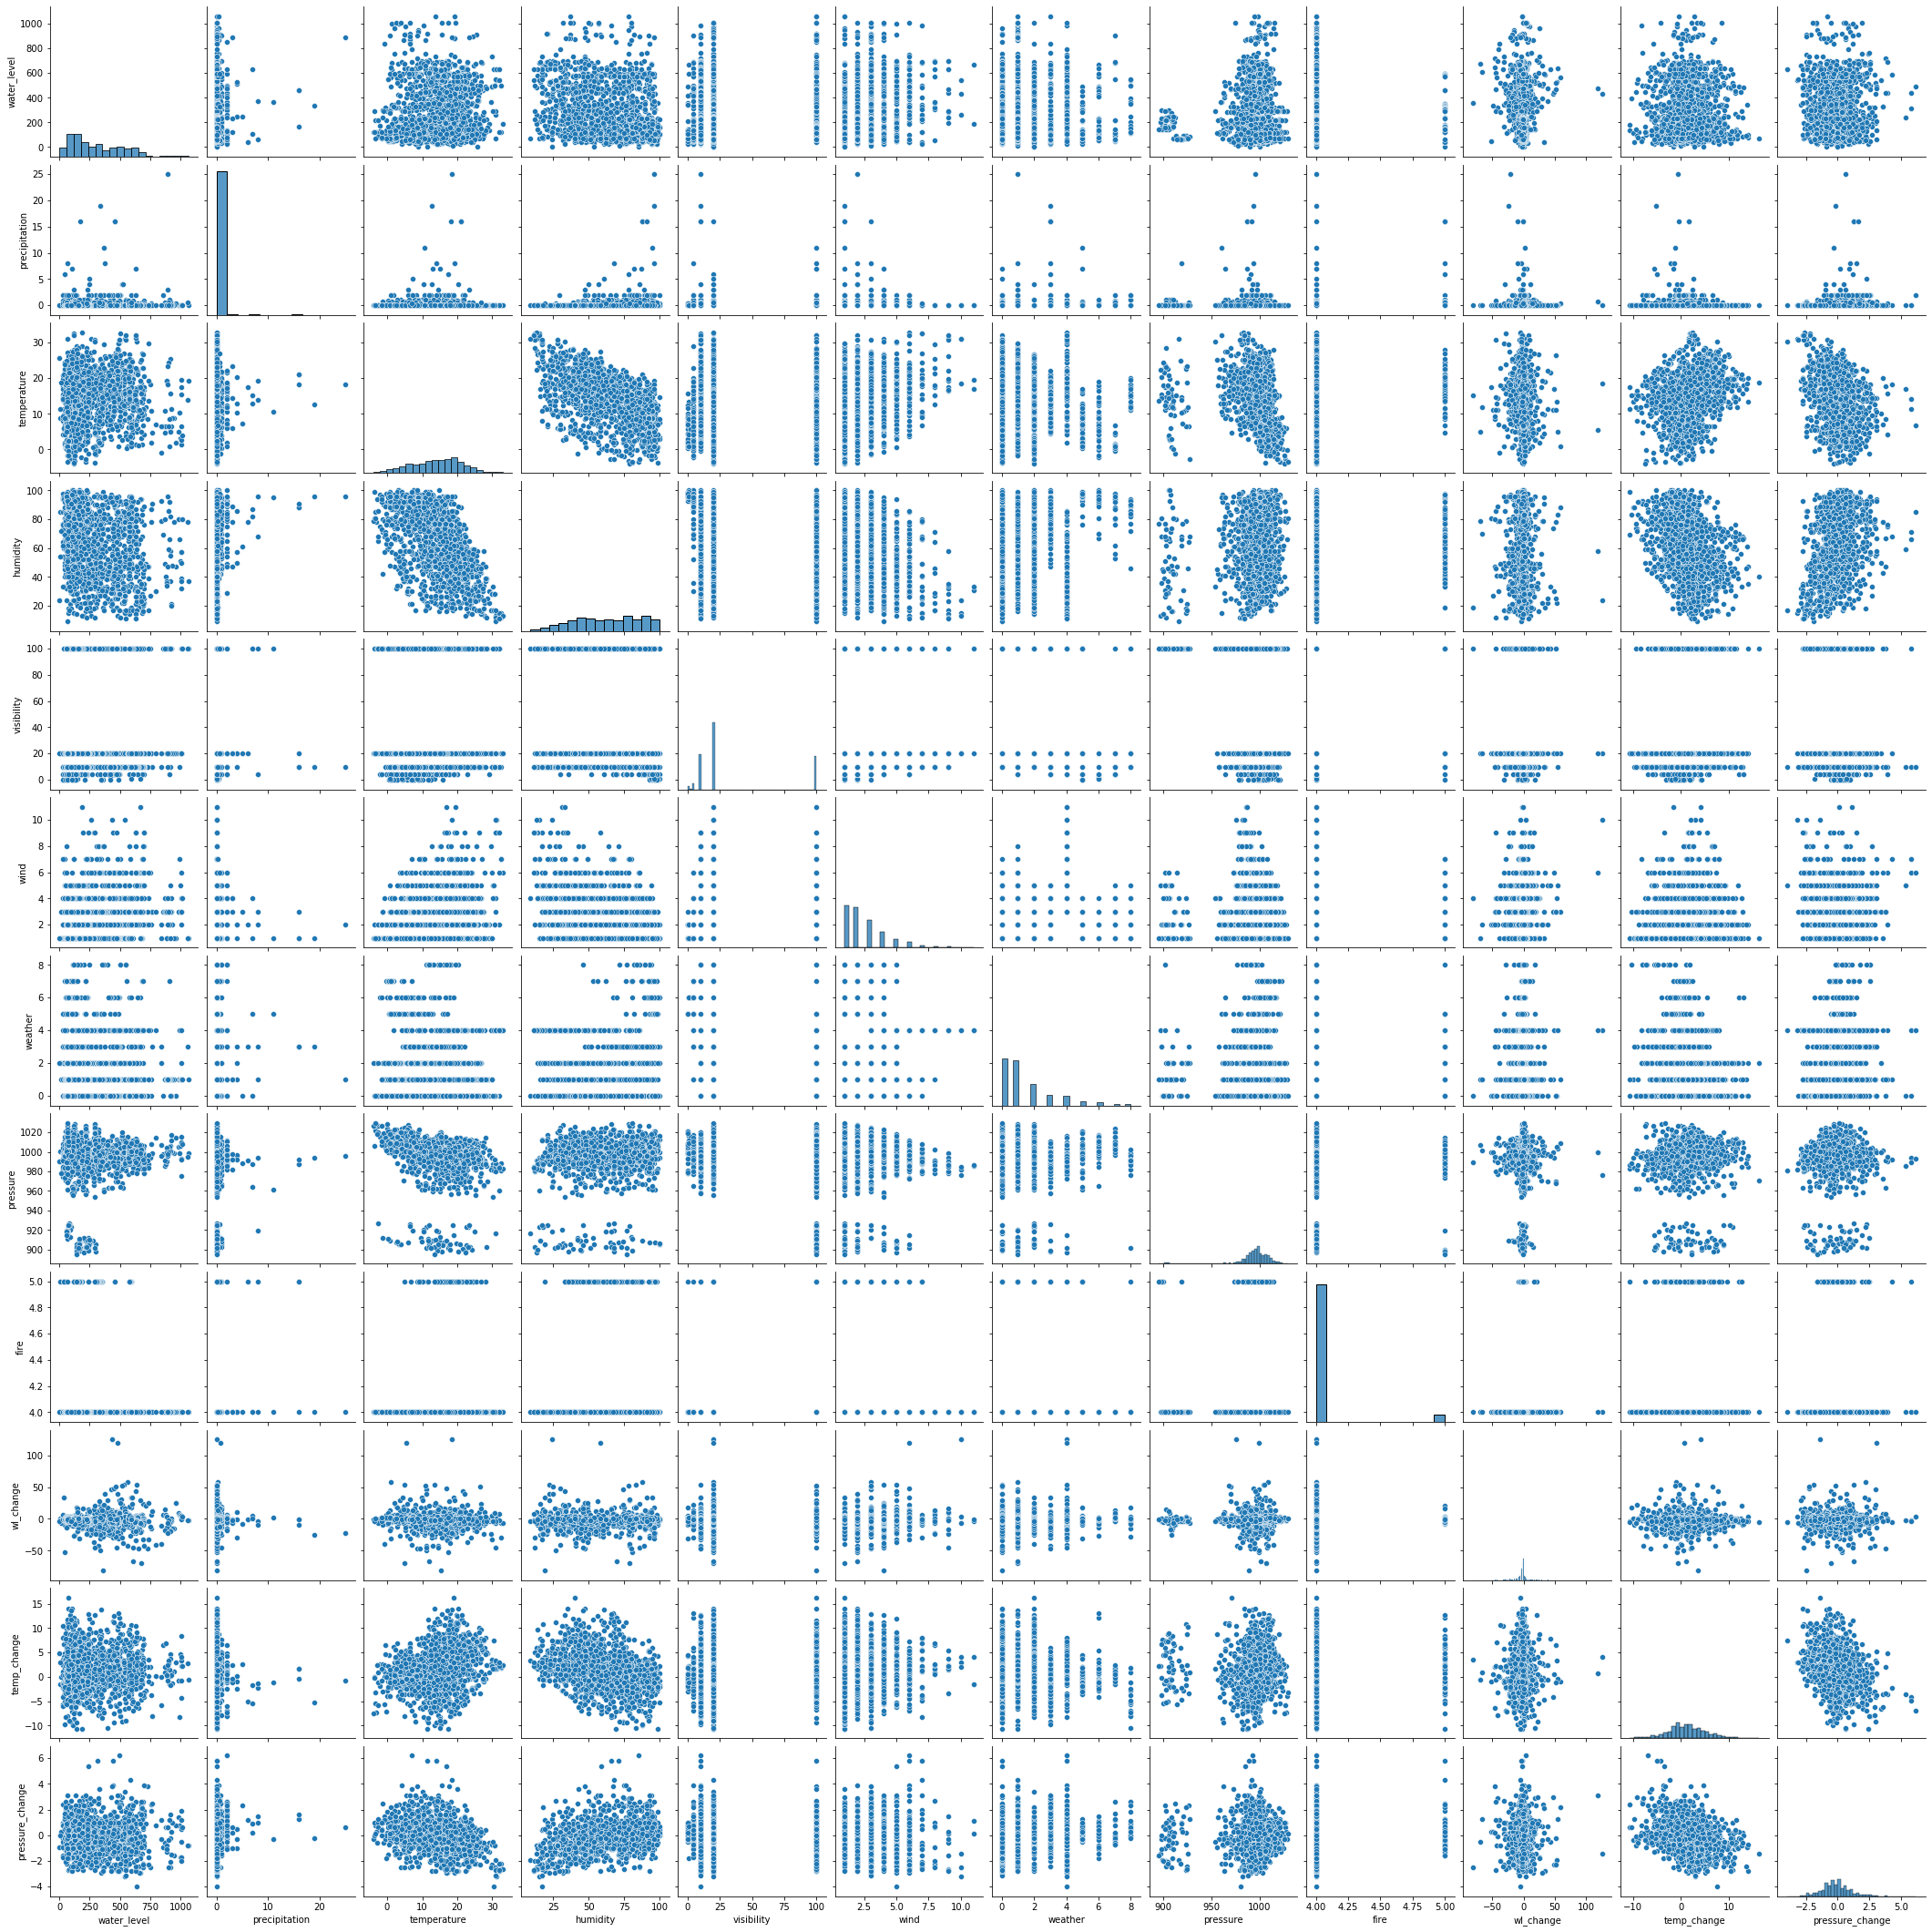

In [12]:
sns.pairplot(df, vars=['water_level', 'precipitation', 'temperature', 'humidity', 'visibility', 'wind', 'weather', 'pressure', 'fire', 'wl_change', 'temp_change','pressure_change'])

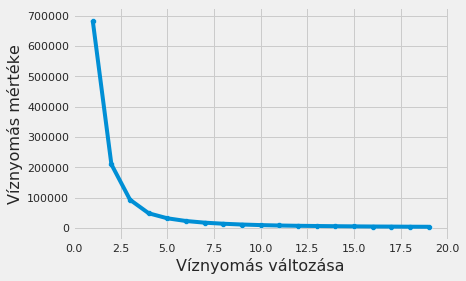

In [57]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

err = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['pressure','pressure_change']])
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)
plt.xlabel('Víznyomás változása', size = 16)
plt.ylabel('Víznyomás mértéke', size = 16)
sns.lineplot(err[:,0], err[:,1])
sns.scatterplot(err[:,0], err[:,1])

A fenti blokkban az ábra megjelenítése előtti sorokban meghívásra kerülnek a klaszterezéshez illetve a k-középhez szükséges metódusok.

Text(0, 0.5, 'Hőmérséklet változás')

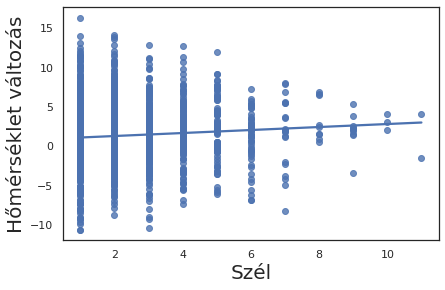

In [14]:
sns.set(style = 'white')
sns.regplot(data=df, x="wind", y="temp_change", ci = None)
plt.xlabel('Szél', size = 20)
plt.ylabel('Hőmérséklet változás', size = 20)

# Regresszió (B rész)

### Lineáris regresszió
A lineáris regresszió a kétváltozós regresszió legegyszerűbb formája. Egy vagy több független változó hatását vizsgálja egy függő változóra. Az eljárás során az adatainkhoz legjobban illeszkedő egyenest keressük. 

A lineáris regresszió fő kérdése, hogy mi az a lineáris függvény segítségével megadható szabály, amellyel az egyik változó (x) értékét megismerve előrejelzést tehetünk egy másik változó (y) értékére vonatkozóan (regressziós függvény).

Két esetet vizsgálok melyek: a víznyomás-víznyomás változását, illetve a hőmérséklet-hőmérséklet változások közötti viszonyokat vizsgálom meg.

In [15]:
from sklearn.linear_model import LinearRegression
X = df[['pressure']].to_numpy()
X[:10]

array([[ 993.8],
       [1004.1],
       [1001.2],
       [ 992.3],
       [1001.3],
       [ 999.9],
       [ 987.3],
       [ 996.6],
       [ 987.3],
       [ 996.6]])

In [16]:
y = df['pressure_change'].to_numpy()
y[:10]

array([-0.4, -1. , -0.3, -1.3, -1.3, -0.7,  1.3,  2.6,  1.3,  2.6])

A vizsgálathoz létrehozok 1-1 vektort amibe 10-10 elemet teszek a vektorba.

Elvégzem a regresszió kiszámítását.

In [17]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
reg.coef_

array([0.0020821])

In [19]:
reg.intercept_

-2.171200567935044

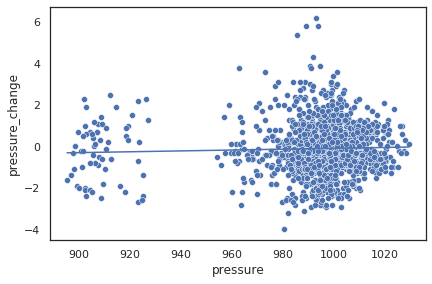

In [20]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
h = theta0 + theta1 * df['pressure']
sns.scatterplot(df['pressure'],df['pressure_change'])
sns.lineplot(df['pressure'],h)

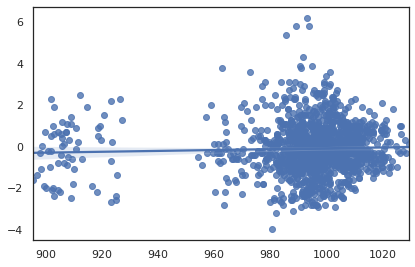

In [21]:
sns.regplot(X,y)

### Második lineáris regresszió

Az első esethez hasonlóan létrehozok két vektort, ebben az esetben 15-15 elemszámmal, azután ismét jön a regresszió számítás

In [22]:
X = df[['temperature']].to_numpy()
X[:15]

array([[24.9],
       [27.9],
       [25.6],
       [26.7],
       [29.1],
       [27.2],
       [21. ],
       [18.2],
       [21. ],
       [18.2],
       [24.7],
       [24.9],
       [29. ],
       [20.2],
       [16.6]])

In [23]:
y = df['temp_change'].to_numpy()
y[:15]

array([-0.3,  0.6, -1.8,  1.2,  2.5, -0.8,  1.6, -8. ,  1.6, -8. ,  1.1,
        0.7,  1. , -5.6,  6. ])

In [24]:
reg2 = LinearRegression()
reg2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
reg2.coef_

array([0.15903193])

In [26]:
reg2.intercept_

-0.8678189433369912

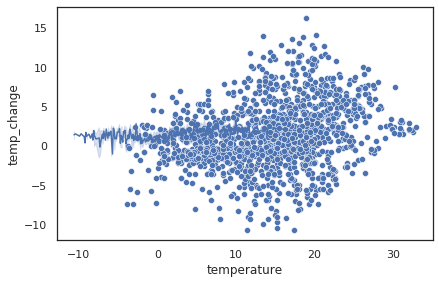

In [27]:
theta0 = reg2.intercept_
theta1 = reg2.coef_[0]
h = theta0 + theta1 * df['temperature']
sns.scatterplot(df['temperature'],df['temp_change'])
sns.lineplot(df['temp_change'],h)

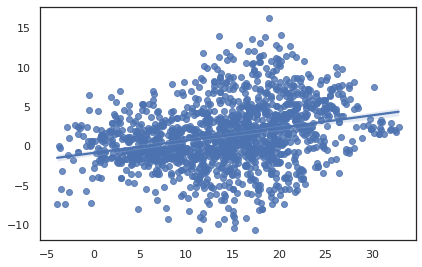

In [28]:
sns.regplot(X,y)

### Logisztikus regresszió


A logisztikus regresszió megbecsüli egy bizonyos esemény (a függő változó) bekövetkezésének valószínűségét. A diszkriminanciaelemzés altervatívája. Alkalmazási előfeltételei sokkal kevésbé szigorúak, mint a diszkriminanciaelemzésé. Egy függő változó és kettő vagy több független változó közötti kapcsolat leírására szolgál. Általában a függő változó egy esemény. Az elemzés során azt vizsgáljuk, hogy ez az esemény bekövetkezik-e, vagy sem. Ehhez meg kell vizsgálnunk az összes olyan tényezőt, amely összefüggésbe hozható az eseménnyel. A logisztikus regressziót leggyakrabban egy esemény előrejelzésére használják.

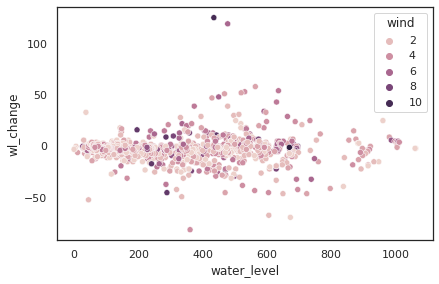

In [29]:
import sklearn
sns.scatterplot(df['water_level'],df['wl_change'],hue=df['wind'])

In [30]:
from sklearn.linear_model import LogisticRegression

meghívom a logisztikus regresszióhoz szükséges metódust.

Az előző 2 esethez hasonlóan ismételten létrehozom az egydimenziós tömböket 10-10 elemszámmal. Az előzőekhez képest annyi változtatásra van szükség, hogy kelleni fog a kettő összehasonlítható attribútum(vízmélység, vízmélység változása) mellé egy harmadik attribútum ami "lazábban" kapcsolódik a másik két értékhez. (jelen kódban a "tűz" oszlop, ami veszélyességet jelenti)

In [31]:
X = df[['water_level','wl_change']].to_numpy()
X[:10]

array([[468.,  -3.],
       [140.,  -2.],
       [464.,  -7.],
       [467.,  -1.],
       [138.,  -2.],
       [461.,  -3.],
       [459.,  -1.],
       [500.,  -2.],
       [459.,  -1.],
       [500.,  -2.]])

In [32]:
y = df['fire'].to_numpy()
y[:10]

array([4, 4, 4, 4, 4, 4, 5, 4, 5, 4])

In [33]:
reg3 = LogisticRegression()
reg3.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
reg3.coef_

array([[-0.00082181,  0.01113688]])

In [35]:
reg3.intercept_

array([-2.65075002])

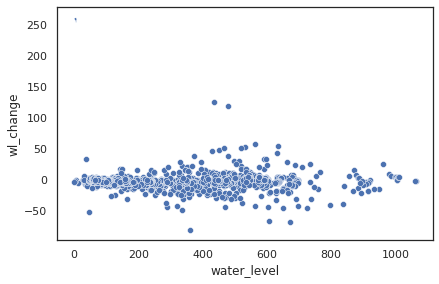

In [36]:
theta0 = reg3.intercept_[0]
theta1 = reg3.coef_[0,0]
theta2 = reg3.coef_[0,1]
x2 = -(theta0 + theta1 * df['water_level']) / theta2
sns.scatterplot(df['water_level'], df['wl_change'])
sns.lineplot(df['fire'], x2)

### Összegzés

A két regresszió közötti legnagyobb eltérés az az, hogy a lineráis reg. esetén van x ammi függő és van y ami független. Míg a logisztikus reg. esetén van egy független (x) és van kettő vagy több független változó.

## Osztályozás, gépi tanulás

### K közép módszer

K -közép módszer egy középpontot (centroidot) választ ki prototípusnak, amely általában pontok egy csoportjának az átlaga, és jellemzően csak folytonos, n -dimenziós térben elhelyezkedő pontokra alkalmazható.

A K -közép klaszterezési módszer egyszerű. mi pedig az alapvető algoritmus egy leírásával kezdjük. Első lépésként kiválasztunk K darab kezdő középpontot, ahol K a felhasználó által megadott paraméter, nevezetesen a klaszterek kívánt száma. Ezután minden adatpontot a hozzá legközelebb eső középponthoz rendelünk, és az így képzett csoportok lesznek a kiinduló klaszterek. Ezután mindegyik klaszter középpontját a klaszterhez rendelt pontok alapján frissítjük. A hozzárendelési és frissítési lépéseket felváltva folytatjuk addig, amíg egyetlen pont sem vált klasztert, vagy ezzel egyenértékűen, míg a középpontok ugyanazok nem maradnak.

In [37]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['pressure','pressure_change']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
kmeans.cluster_centers_

array([[ 9.87367412e+02, -1.65814696e-01],
       [ 9.09309375e+02, -2.10937500e-01],
       [ 1.00562437e+03, -3.94150418e-02]])

In [39]:
def plot_result(kmeans):
    plt.figure(figsize=(9,5))
    sns.scatterplot(x=df['pressure'], y=df['pressure_change'], hue=kmeans.labels_, palette="Set3", marker='*')
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='o',s=50, c=['red'])

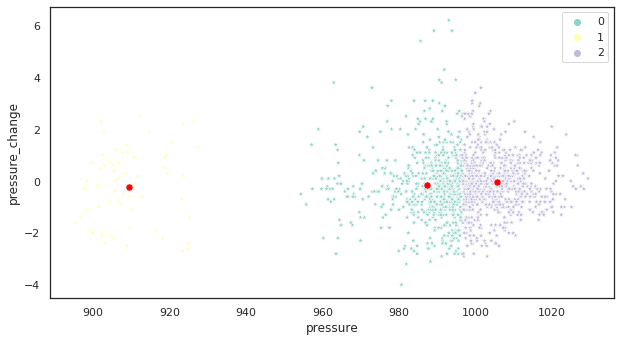

In [40]:
plot_result(kmeans)

In [41]:
p1 = df.loc[:,'water_level':'pressure']
p2 = df.loc[:,'wl_change':'pressure_change']
result = pd.concat([p1,p2], axis=1)
result.head()

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,wl_change,temp_change,pressure_change
0,468,0.0,24.9,31.0,100.0,4.0,0,993.8,-3.0,-0.3,-0.4
1,140,0.0,27.9,22.0,20.0,1.0,0,1004.1,-2.0,0.6,-1.0
2,464,0.0,25.6,28.0,20.0,2.0,1,1001.2,-7.0,-1.8,-0.3
3,467,0.0,26.7,26.0,100.0,3.0,0,992.3,-1.0,1.2,-1.3
4,138,0.0,29.1,22.0,20.0,1.0,0,1001.3,-2.0,2.5,-1.3


In [42]:
from sklearn.model_selection import train_test_split
y = df['temperature']
X = result
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=1)

# Normalizálás

In [43]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scaler.mean_

array([ 3.08518782e+02,  2.05076142e-01,  1.42436548e+01,  6.26000000e+01,
        3.57827411e+01,  2.64162437e+00,  1.51878173e+00,  9.93266193e+02,
       -2.44060914e+00,  1.34751269e+00, -7.80710660e-02])

In [45]:
scaler.scale_

array([219.28081318,   1.24239601,   7.08542386,  22.57945699,
        36.73255664,   1.7065099 ,   1.72409103,  21.63541757,
        10.76367154,   3.99306968,   1.20473109])

In [46]:
X_train_normalized = scaler.transform(X_train)

In [47]:
X_train_normalized.mean(axis=0)

array([-9.55806218e-17, -4.32817910e-17, -1.08204478e-16, -6.49226865e-17,
       -3.60681592e-18, -1.08204478e-17, -6.40209825e-17,  1.00990846e-16,
       -1.08204478e-17, -3.96749751e-17,  2.88545273e-17])

In [48]:
X_train_normalized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

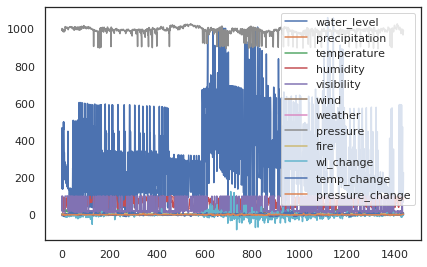

In [49]:
df.plot()

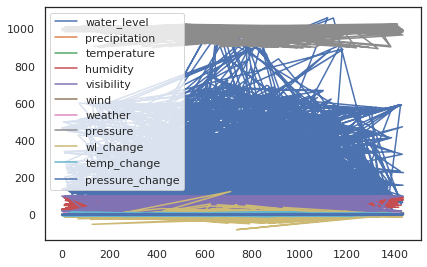

In [50]:
df_train_normalized = X_train.copy()
result = X_train_normalized
df_train_normalized.plot()